# Neural Network

In [25]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

import os
import tempfile
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix, f1_score, balanced_accuracy_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.utils import compute_class_weight



## Methylation

In [11]:
file = tf.keras.utils
methylation = pd.read_csv('Top 20 most different methylation.csv', index_col=0)
display(methylation)

methylation.value_counts('Label')

,Label,cg27260772,cg18502142,cg21039708,cg22399133,cg00907288,cg10903903,cg22620090,cg22797031,cg08364561,...,cg18121066,cg10512745,cg02772121,cg18698788,cg22674699,cg04209913,cg04741094,cg01221209,cg21472506,cg17510385
TCGA.18.3417.11,Solid Tissue Normal,0.035158,0.102059,0.053721,0.034776,0.044032,0.058046,0.191143,0.058872,0.069079,...,0.918910,0.021139,0.930971,0.034897,0.027477,0.091148,0.926543,0.969629,0.035818,0.966334
TCGA.18.3417.01,Primary Tumor,0.684921,0.886011,0.759637,0.691114,0.585161,0.711261,0.752820,0.834291,0.573485,...,0.137222,0.668052,0.459951,0.644807,0.727943,0.713332,0.215235,0.288666,0.564102,0.282195
TCGA.18.4721.11,Solid Tissue Normal,0.065322,0.103055,0.063291,0.049354,0.088461,0.053365,0.136535,0.045385,0.074104,...,0.932528,0.038356,0.943025,0.039635,0.043081,0.049214,0.889797,0.956493,0.018292,0.963781
TCGA.18.4721.01,Primary Tumor,0.702516,0.817648,0.658254,0.641455,0.724215,0.612201,0.820834,0.752931,0.704806,...,0.175593,0.548144,0.456049,0.549470,0.714935,0.658791,0.292942,0.535579,0.444189,0.390284
TCGA.18.5592.11,Solid Tissue Normal,0.048796,0.103236,0.059445,0.041855,0.060773,0.067011,0.126250,0.058525,0.061173,...,0.823895,0.061384,0.945073,0.039128,0.020259,0.054639,0.900305,0.974124,0.035466,0.957785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA.O2.A52S.01,Primary Tumor,0.873089,0.903267,0.861487,0.912139,0.930026,0.723371,0.930770,0.915396,0.920674,...,0.028695,0.739815,0.184275,0.784893,0.669663,0.832614,0.265975,0.205679,0.820369,0.235278
TCGA.O2.A52V.01,Primary Tumor,0.704836,0.660402,0.755574,0.654864,0.634069,0.592889,0.845250,0.655539,0.558564,...,0.192352,0.617358,0.441837,0.641266,0.690398,0.705222,0.213332,0.476743,0.525680,0.350962
TCGA.O2.A52W.01,Primary Tumor,0.809654,0.816498,0.817063,0.787262,0.734660,0.825252,0.817483,0.711051,0.596998,...,0.175411,0.666469,0.396496,0.625439,0.711834,0.681890,0.276422,0.361544,0.682502,0.278099
TCGA.O2.A5IB.01,Primary Tumor,0.032576,0.950340,0.975163,0.971375,0.148377,0.975271,0.985536,0.979958,0.958142,...,0.056373,0.026516,0.046576,0.939958,0.036470,0.966181,0.122853,0.071124,0.958554,0.864938


Label
Primary Tumor          370
Solid Tissue Normal     42
dtype: int64

In [12]:
methylation.isna().values.any()


False

Using minmaxscaling because: 
- knowing the range of value from 0-1.0
- different between counting across samples is really big

In [13]:
methylation_df = methylation.copy()
methylation_df.pop('Label')

#normalize by minamaxscaler()
scaler = MinMaxScaler()
scaler.fit(methylation_df)
scaled = scaler.fit_transform(methylation_df)
scaled_methylation=pd.DataFrame(scaled, columns=methylation_df.columns, index=methylation_df.index)

#add label back
scaled_methylation.insert(0, 'Label', methylation['Label'])
scaled_methylation.describe()

,cg27260772,cg18502142,cg21039708,cg22399133,cg00907288,cg10903903,cg22620090,cg22797031,cg08364561,cg17774559,cg18121066,cg10512745,cg02772121,cg18698788,cg22674699,cg04209913,cg04741094,cg01221209,cg21472506,cg17510385
count,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000
mean,0.661902,0.729656,0.680534,0.630110,0.656275,0.605371,0.719203,0.690752,0.630140,0.673221,0.251864,0.599856,0.343766,0.580705,0.629936,0.624139,0.344459,0.421621,0.585874,0.394595
std,0.297431,0.269473,0.283818,0.293975,0.290859,0.303492,0.269791,0.263477,0.280455,0.247166,0.305551,0.279596,0.255691,0.259129,0.270591,0.296405,0.281051,0.281102,0.262790,0.296301
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.590344,0.669743,0.625681,0.523906,0.529615,0.440499,0.653380,0.603555,0.532836,0.640757,0.045877,0.567392,0.162879,0.498054,0.640872,0.474974,0.136257,0.225779,0.452368,0.183754
50%,0.758887,0.824583,0.771853,0.719494,0.757844,0.697069,0.820225,0.770697,0.702387,0.757319,0.120218,0.695356,0.275935,0.643505,0.723723,0.720296,0.249482,0.352530,0.632964,0.307546
75%,0.865263,0.921798,0.877570,0.834091,0.868939,0.843906,0.910819,0.885359,0.838177,0.830499,0.284579,0.777417,0.445472,0.754206,0.792975,0.854243,0.470297,0.556130,0.779594,0.490442
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


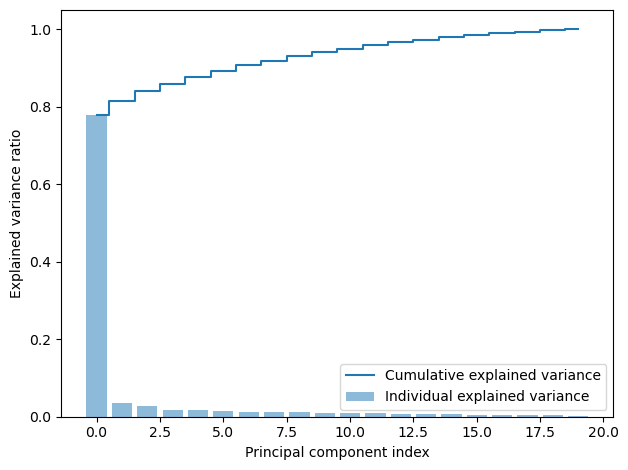

In [26]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plot
#PCA
pca = PCA()

# Determine transformed features
meth_pca = pca.fit_transform(scaled_methylation.loc[:, scaled_methylation.columns != 'Label'])

# Determine explained variance using explained_variance_ration_ attribute
exp_var_pca = pca.explained_variance_ratio_

# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.

cum_sum_eigenvalues = np.cumsum(exp_var_pca)

# Create the visualization plot
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

=> just around 5 markers are enough for explaining this data.

In [15]:
METRICS = [ 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall')
]


def make_NeuralNetwork(metrics=METRICS):
    model = keras.Sequential([
        keras.layers.Dense(
            8, activation='sigmoid',
            input_shape=(20,)),
        keras.layers.Dense(2, activation='sigmoid')])

    model.compile(
          optimizer=keras.optimizers.Adam(learning_rate=1e-3),
          loss=keras.losses.BinaryCrossentropy(),
          metrics=metrics)

    return model

In [16]:
labels = scaled_methylation['Label'].values
encoder = LabelEncoder() 
encoder.fit(labels)
# .classes_ to print label classes
encoded_Y = encoder.transform(labels) #transform into label encodings (integers)
dummy_y = np_utils.to_categorical(encoded_Y)

In [17]:
#pop 'Label'
methylation_data = scaled_methylation.copy()
methylation_data.pop('Label')


#sampling 
X_train, X_remain, y_train, y_remain = train_test_split(methylation_df, dummy_y, train_size=0.75, shuffle=True, random_state=7, 
                                                        stratify=encoded_Y)

# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
X_val, X_test, y_val, y_test = train_test_split(X_remain,y_remain, test_size=0.5, shuffle=True, random_state=7)

print(X_train.shape), print(y_train.shape)
print(X_val.shape), print(y_val.shape)
print(X_test.shape), print(y_test.shape)

(309, 20)
(309, 2)
(51, 20)
(51, 2)
(52, 20)
(52, 2)


(None, None)

In [18]:
dummy_y

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.

## Try class weight for imbalance class data

address the class imbalance by applying class weight -> different loss function for major and minor class

In [19]:
# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
y_integers = np.argmax(y_train, axis=1)
class_weights = compute_class_weight('balanced', classes=np.unique(y_integers), y=y_integers)
d_class_weights = dict(enumerate(class_weights))
d_class_weights

{0: 0.5557553956834532, 1: 4.983870967741935}

In [20]:
weighted_model = Sequential()
weighted_model.add(Dense(8,  activation='sigmoid', input_shape=(20,),  name="bottleneck")) 
weighted_model.add(Dense(2,  activation='sigmoid'))

weighted_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# loss = binaryCrossentropy because y in form of [0., 1.] 
# adam -> using adam algorithsm , learning rate = 1e-11
# metrics: calculating the accuracy

history2 = weighted_model.fit(X_train, y_train, epochs = 50, batch_size = 4, class_weight=d_class_weights)
#epochs and batch_size is low because it better for model to limit overfitting for imblance data

Epoch 1/50
78/78 [==============================] - 0s 637us/step - loss: 0.6728 - accuracy: 0.2039
Epoch 2/50
78/78 [==============================] - 0s 701us/step - loss: 0.6001 - accuracy: 0.9579
Epoch 3/50
78/78 [==============================] - 0s 675us/step - loss: 0.5411 - accuracy: 0.9741
Epoch 4/50
78/78 [==============================] - 0s 675us/step - loss: 0.4871 - accuracy: 0.9741
Epoch 5/50
78/78 [==============================] - 0s 662us/step - loss: 0.4367 - accuracy: 0.9773
Epoch 6/50
78/78 [==============================] - 0s 649us/step - loss: 0.3893 - accuracy: 0.9741
Epoch 7/50
78/78 [==============================] - 0s 637us/step - loss: 0.3449 - accuracy: 0.9806
Epoch 8/50
78/78 [==============================] - 0s 649us/step - loss: 0.3057 - accuracy: 0.9806
Epoch 9/50
78/78 [==============================] - 0s 637us/step - loss: 0.2709 - accuracy: 0.9741
Epoch 10/50
78/78 [==============================] - 0s 650us/step - loss: 0.2408 - accuracy: 0.9773

In [21]:
history2_val = weighted_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, 
                                batch_size = 2048, class_weight=d_class_weights)

Epoch 1/50
1/1 [==============================] - 0s 142ms/step - loss: 0.0411 - accuracy: 0.9871 - val_loss: 0.0103 - val_accuracy: 1.0000
Epoch 2/50
1/1 [==============================] - 0s 20ms/step - loss: 0.0410 - accuracy: 0.9871 - val_loss: 0.0103 - val_accuracy: 1.0000
Epoch 3/50
1/1 [==============================] - 0s 20ms/step - loss: 0.0410 - accuracy: 0.9871 - val_loss: 0.0102 - val_accuracy: 1.0000
Epoch 4/50
1/1 [==============================] - 0s 19ms/step - loss: 0.0410 - accuracy: 0.9871 - val_loss: 0.0102 - val_accuracy: 1.0000
Epoch 5/50
1/1 [==============================] - 0s 20ms/step - loss: 0.0410 - accuracy: 0.9871 - val_loss: 0.0102 - val_accuracy: 1.0000
Epoch 6/50
1/1 [==============================] - 0s 20ms/step - loss: 0.0410 - accuracy: 0.9871 - val_loss: 0.0102 - val_accuracy: 1.0000
Epoch 7/50
1/1 [==============================] - 0s 20ms/step - loss: 0.0410 - accuracy: 0.9871 - val_loss: 0.0102 - val_accuracy: 1.0000
Epoch 8/50
1/1 [==========

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bottleneck (Dense)          (None, 8)                 168       
                                                                 
 dense (Dense)               (None, 2)                 18        
                                                                 
Total params: 186
Trainable params: 186
Non-trainable params: 0
_________________________________________________________________


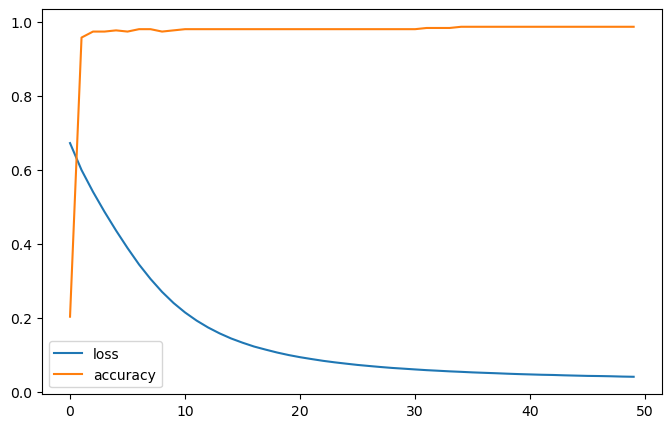

In [22]:
weighted_model.summary()

pd.DataFrame(history2.history).plot(figsize=(8,5))
plt.show()

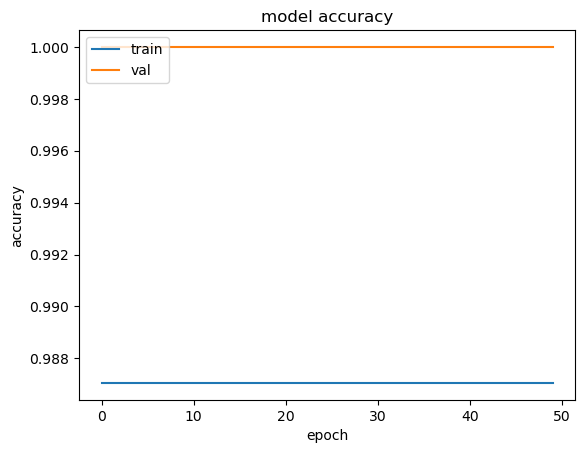

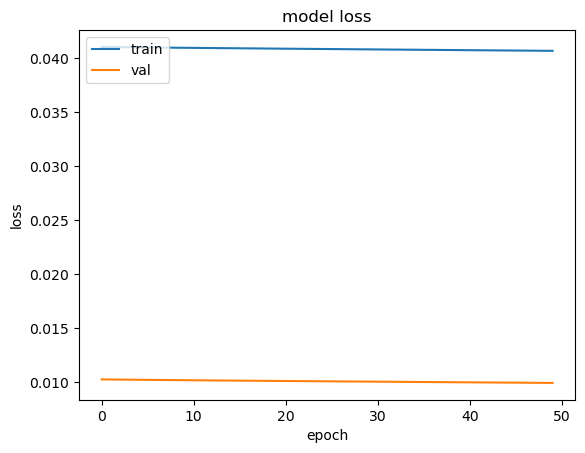

In [27]:
# summarize history for accuracy
plt.plot(history2_val.history['accuracy'])
plt.plot(history2_val.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history2_val.history['loss'])
plt.plot(history2_val.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [29]:
predictions = weighted_model.predict(methylation_data)
prediction_ = np.argmax(predictions, axis = 1)
prediction_ = encoder.inverse_transform(prediction_)
for i, j in zip(prediction_ , labels):
    print( " the nn predict {}, and the tumour tissue is {}".format(i,j))
confusion_matrix(prediction_, labels)

13/13 [==============================] - 0s 500us/step
 the nn predict Solid Tissue Normal, and the tumour tissue is Solid Tissue Normal
 the nn predict Primary Tumor, and the tumour tissue is Primary Tumor
 the nn predict Solid Tissue Normal, and the tumour tissue is Solid Tissue Normal
 the nn predict Primary Tumor, and the tumour tissue is Primary Tumor
 the nn predict Solid Tissue Normal, and the tumour tissue is Solid Tissue Normal
 the nn predict Primary Tumor, and the tumour tissue is Primary Tumor
 the nn predict Solid Tissue Normal, and the tumour tissue is Solid Tissue Normal
 the nn predict Primary Tumor, and the tumour tissue is Primary Tumor
 the nn predict Primary Tumor, and the tumour tissue is Primary Tumor
 the nn predict Primary Tumor, and the tumour tissue is Primary Tumor
 the nn predict Primary Tumor, and the tumour tissue is Primary Tumor
 the nn predict Primary Tumor, and the tumour tissue is Primary Tumor
 the nn predict Primary Tumor, and the tumour tissue is P

array([[365,   0],
       [  5,  42]], dtype=int64)

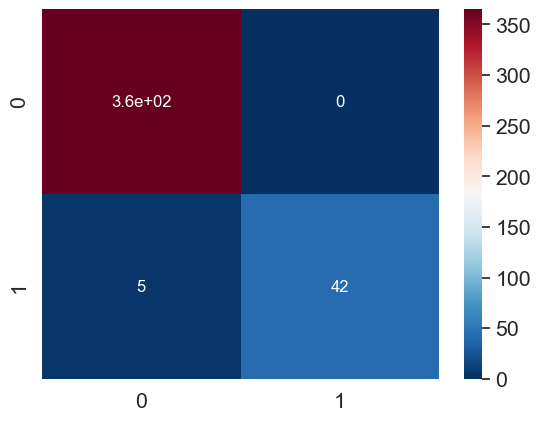

In [30]:
sns.set(font_scale=1.4) # for label size
sns.heatmap(confusion_matrix(prediction_, labels), annot=True, annot_kws={"size":12}, cmap='RdBu_r') # font size
plt.show()

In [31]:
#evaluate base on loss and accuracy
baseline_results = weighted_model.evaluate(X_test, y_test,
                                  batch_size=4, verbose=0)
for name, value in zip(weighted_model.metrics_names, baseline_results):
      print(name, ': ', value)
print()

#F1_score for 
F1_methylation = f1_score(labels, prediction_, average='weighted')
print('F1 score with weighted option:', F1_methylation)

#Balance accuracy score
BA_score = balanced_accuracy_score(labels, prediction_)
print('Balance accuracy score: ', BA_score)

loss :  0.05660371482372284
accuracy :  0.9807692170143127

F1 score with weighted option: 0.9881636957171874
Balance accuracy score:  0.9932432432432432


-------------------

# mysterious methylation

In [200]:
mysterious_meth = pd.read_csv("mystery_dna-meth.csv", header=0, index_col=0)

In [201]:
mysterious_meth.head()

,Label,cg00001583,cg00001747,cg00002719,cg00011616,cg00013655,cg00025347,cg00034076,cg00036011,cg00041599,...,cg27527798,cg27538352,cg27539986,cg27546977,cg27553926,cg27583037,cg27592331,cg27623451,cg27633287,cg27649037
TCGA.C8.A274.01,Primary Tumor,0.776662,0.809844,0.891880,0.328564,0.849209,0.235096,0.714533,0.048083,0.789195,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA.E2.A572.01,Primary Tumor,0.669769,0.029292,0.761326,0.188135,0.830146,0.308065,0.742329,0.413321,0.780104,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA.AO.A0JA.01,Primary Tumor,0.505964,0.525509,0.806467,0.940331,0.711453,0.328805,0.155193,0.031138,0.690710,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA.E2.A1BD.01,Primary Tumor,0.814448,0.814974,0.902881,0.069385,0.927201,0.225843,0.794465,0.766701,0.583945,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA.AC.A5EH.01,Primary Tumor,0.418687,0.031154,0.449726,0.160170,0.617900,0.605715,0.076246,0.067412,0.729701,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [202]:
mysterious_meth.shape

(380, 18092)

In [203]:
list_marker = list(methylation.columns) 

In [204]:
mys_meth_df = mysterious_meth[list_marker]
display(mys_meth_df)

,Label,cg27260772,cg18502142,cg21039708,cg22399133,cg00907288,cg10903903,cg22620090,cg22797031,cg08364561,...,cg18121066,cg10512745,cg02772121,cg18698788,cg22674699,cg04209913,cg04741094,cg01221209,cg21472506,cg17510385
TCGA.C8.A274.01,Primary Tumor,0.201685,0.918191,0.953713,0.924899,0.869151,0.814441,0.973836,NaN,0.878947,...,0.903025,0.825688,0.144856,NaN,0.826751,NaN,NaN,0.137197,0.931810,NaN
TCGA.E2.A572.01,Primary Tumor,0.882793,0.638526,0.842178,0.879772,0.298918,0.814498,0.937093,NaN,0.820005,...,0.857089,0.373574,0.928420,NaN,0.420670,NaN,NaN,0.821708,0.704674,NaN
TCGA.AO.A0JA.01,Primary Tumor,0.517306,0.832879,0.846404,0.940904,0.926706,0.671961,0.971436,NaN,0.488002,...,0.771840,0.039899,0.749809,NaN,0.814030,NaN,NaN,0.598599,0.772800,NaN
TCGA.E2.A1BD.01,Primary Tumor,0.057295,0.923276,0.778029,0.952378,0.392160,0.837246,0.975552,NaN,0.912257,...,0.940496,0.092335,0.195911,NaN,0.864858,NaN,NaN,0.502988,0.849136,NaN
TCGA.AC.A5EH.01,Primary Tumor,0.053517,0.081174,0.080027,0.773540,0.649387,0.175361,0.908872,NaN,0.578086,...,0.878953,0.615262,0.385072,NaN,0.553215,NaN,NaN,0.379531,0.611315,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA.18.5595.11,Solid Tissue Normal,0.052628,0.136118,0.054297,0.045360,0.102108,0.042487,0.103970,0.047616,0.065519,...,0.856619,0.023188,0.907555,0.040428,0.018812,0.084015,0.893266,0.966092,0.021234,0.965997
TCGA.39.5036.11,Solid Tissue Normal,0.054628,0.083118,0.097090,0.042126,0.122265,0.052100,0.173316,0.098829,0.069008,...,0.905461,0.022350,0.888194,0.024164,0.040895,0.099622,0.901334,0.974693,0.024531,0.966292
TCGA.22.5492.11,Solid Tissue Normal,0.045163,0.156263,0.105969,0.055394,0.067926,0.052562,0.231241,0.093161,0.069866,...,0.783074,0.023996,0.927773,0.047200,0.022943,0.074774,0.895700,0.938288,0.070087,0.929615
TCGA.22.5477.11,Solid Tissue Normal,0.072225,0.079315,0.132765,0.065659,0.066370,0.073753,0.213268,0.143020,0.098432,...,0.610349,0.023140,0.890016,0.030626,0.032800,0.084191,0.882964,0.971879,0.218643,0.865638


In [205]:
mys_meth_df.isnull().any(axis=1).sum()

304

=> we have a lot of missing value -> can expect a poor result for this

In [207]:
nan_col = mys_meth_df.columns[mys_meth_df.isnull().any()].tolist()

In [209]:
#will tread these NaN as -1 => non exist value in the set of data
#mys_meth_df= mys_meth_df.fillna(float(-1))
for col in nan_col:
    mys_meth_df[col] = mys_meth_df[col].fillna(mys_meth_df.groupby('Label')[col].transform('mean'))

C:\Users\linhn\AppData\Local\Temp\ipykernel_31516\3525187247.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mys_meth_df[col] = mys_meth_df[col].fillna(mys_meth_df.groupby('Label')[col].transform('mean'))
C:\Users\linhn\AppData\Local\Temp\ipykernel_31516\3525187247.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mys_meth_df[col] = mys_meth_df[col].fillna(mys_meth_df.groupby('Label')[col].transform('mean'))
C:\Users\linhn\AppData\Local\Temp\ipykernel_31516\3525187247.py:4: SettingWithCopyWarning: 
A 

In [210]:
mys_meth_df

,Label,cg27260772,cg18502142,cg21039708,cg22399133,cg00907288,cg10903903,cg22620090,cg22797031,cg08364561,...,cg18121066,cg10512745,cg02772121,cg18698788,cg22674699,cg04209913,cg04741094,cg01221209,cg21472506,cg17510385
TCGA.C8.A274.01,Primary Tumor,0.201685,0.918191,0.953713,0.924899,0.869151,0.814441,0.973836,0.522046,0.878947,...,0.903025,0.825688,0.144856,0.409480,0.826751,0.600353,0.355040,0.137197,0.931810,0.432256
TCGA.E2.A572.01,Primary Tumor,0.882793,0.638526,0.842178,0.879772,0.298918,0.814498,0.937093,0.522046,0.820005,...,0.857089,0.373574,0.928420,0.409480,0.420670,0.600353,0.355040,0.821708,0.704674,0.432256
TCGA.AO.A0JA.01,Primary Tumor,0.517306,0.832879,0.846404,0.940904,0.926706,0.671961,0.971436,0.522046,0.488002,...,0.771840,0.039899,0.749809,0.409480,0.814030,0.600353,0.355040,0.598599,0.772800,0.432256
TCGA.E2.A1BD.01,Primary Tumor,0.057295,0.923276,0.778029,0.952378,0.392160,0.837246,0.975552,0.522046,0.912257,...,0.940496,0.092335,0.195911,0.409480,0.864858,0.600353,0.355040,0.502988,0.849136,0.432256
TCGA.AC.A5EH.01,Primary Tumor,0.053517,0.081174,0.080027,0.773540,0.649387,0.175361,0.908872,0.522046,0.578086,...,0.878953,0.615262,0.385072,0.409480,0.553215,0.600353,0.355040,0.379531,0.611315,0.432256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA.18.5595.11,Solid Tissue Normal,0.052628,0.136118,0.054297,0.045360,0.102108,0.042487,0.103970,0.047616,0.065519,...,0.856619,0.023188,0.907555,0.040428,0.018812,0.084015,0.893266,0.966092,0.021234,0.965997
TCGA.39.5036.11,Solid Tissue Normal,0.054628,0.083118,0.097090,0.042126,0.122265,0.052100,0.173316,0.098829,0.069008,...,0.905461,0.022350,0.888194,0.024164,0.040895,0.099622,0.901334,0.974693,0.024531,0.966292
TCGA.22.5492.11,Solid Tissue Normal,0.045163,0.156263,0.105969,0.055394,0.067926,0.052562,0.231241,0.093161,0.069866,...,0.783074,0.023996,0.927773,0.047200,0.022943,0.074774,0.895700,0.938288,0.070087,0.929615
TCGA.22.5477.11,Solid Tissue Normal,0.072225,0.079315,0.132765,0.065659,0.066370,0.073753,0.213268,0.143020,0.098432,...,0.610349,0.023140,0.890016,0.030626,0.032800,0.084191,0.882964,0.971879,0.218643,0.865638


In [211]:
mys_meth_data = mys_meth_df.copy()
true_label_mys_meth = mys_meth_data.pop("Label")

encoder_mys = LabelEncoder() 
encoder_mys.fit(true_label_mys_meth)
# .classes_ to print label classes
encoded_mys_data = encoder_mys.transform(true_label_mys_meth) #transform into label encodings (integers)


In [212]:
mys_predict2 = weighted_model.predict(mys_meth_data)
mys_prediction2_ = np.argmax(mys_predict2, axis = 1)
mys_prediction2_ = encoder_mys.inverse_transform(mys_prediction2_)

#print prediction
for i, j in zip(mys_prediction2_ , true_label_mys_meth):
    print( " the nn predict {}, and the tumour tissue is {}".format(i,j))
confusion_matrix(mys_prediction2_, true_label_mys_meth)

12/12 [==============================] - 0s 636us/step
 the nn predict Primary Tumor, and the tumour tissue is Primary Tumor
 the nn predict Primary Tumor, and the tumour tissue is Primary Tumor
 the nn predict Primary Tumor, and the tumour tissue is Primary Tumor
 the nn predict Primary Tumor, and the tumour tissue is Primary Tumor
 the nn predict Primary Tumor, and the tumour tissue is Primary Tumor
 the nn predict Primary Tumor, and the tumour tissue is Primary Tumor
 the nn predict Primary Tumor, and the tumour tissue is Primary Tumor
 the nn predict Primary Tumor, and the tumour tissue is Primary Tumor
 the nn predict Primary Tumor, and the tumour tissue is Primary Tumor
 the nn predict Primary Tumor, and the tumour tissue is Primary Tumor
 the nn predict Primary Tumor, and the tumour tissue is Primary Tumor
 the nn predict Primary Tumor, and the tumour tissue is Primary Tumor
 the nn predict Primary Tumor, and the tumour tissue is Primary Tumor
 the nn predict Primary Tumor, and 

array([[189,   3],
       [  1, 187]], dtype=int64)

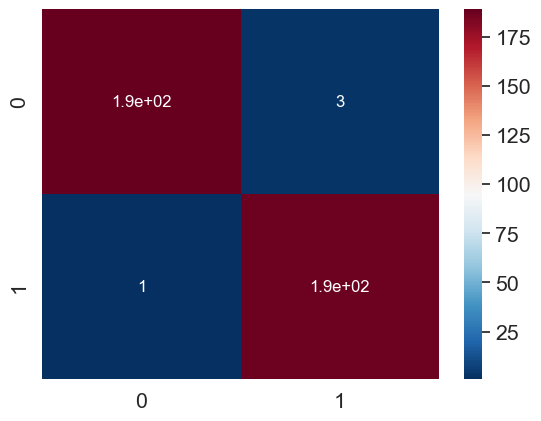

In [213]:
sns.set(font_scale=1.4) # for label size
sns.heatmap(confusion_matrix(mys_prediction2_, true_label_mys_meth), annot=True, annot_kws={"size":12}, cmap='RdBu_r') # font size
plt.show()

In [214]:
#accuracy
print("Accuracy:", accuracy_score(true_label_mys_meth, mys_prediction2_))

#F1_score  
F1_methylation_mys = f1_score(true_label_mys_meth, mys_prediction2_, average='weighted')
print('F1 score with weighted option:', F1_methylation_mys)

#Balance accuracy score
BA_methylation_mys = balanced_accuracy_score(true_label_mys_meth, mys_prediction2_)
print('Balance accuracy score: ', BA_methylation_mys)

Accuracy: 0.9894736842105263
F1 score with weighted option: 0.9894733926147539
Balance accuracy score:  0.9894736842105263


------------------------


# GENE EXPRESSION

In [32]:
expression = pd.read_csv("Top_20_differential_expression_gene.csv", header=0, index_col=0)
display(expression)

expression['Label'].value_counts()

,Label,SLC2A1.6513,CDCA5.113130,CENPA.1058,POLQ.10721,AGER.177,TROAP.10024,KIF14.9928,EXO1.9156,SERPINB5.5268,...,GINS1.9837,CKAP2L.150468,GPR87.53836,KIF23.9493,PLK1.5347,B4GALNT4.338707,CCNB1.891,RAD54L.8438,C19orf59.199675,CLEC3B.7123
TCGA.18.3406.01,Primary Tumor,24354.3307,259.8425,157.4803,129.9213,245.6693,311.8110,129.1339,206.2992,16768.5039,...,734.6457,147.2441,6319.6850,225.1969,332.2835,174.8031,1936.2205,87.4016,180.3150,197.6378
TCGA.18.3407.01,Primary Tumor,27911.5128,598.4776,148.9058,208.8487,255.4710,155.5661,280.2093,347.2883,9081.8268,...,450.0476,284.0152,1154.6147,370.5994,654.6147,274.0247,919.1246,196.4795,56.6127,68.9819
TCGA.18.3408.01,Primary Tumor,11542.0436,417.6183,207.0295,198.1314,39.7449,173.2167,208.8091,381.4326,11991.6951,...,553.4629,329.8235,3976.8649,444.9058,443.7194,15.4234,941.4207,83.6423,48.0498,31.4400
TCGA.18.3409.01,Primary Tumor,19213.8462,305.6410,92.8205,52.3077,333.3333,93.8462,51.2821,108.7179,2129.2308,...,692.8205,120.5128,3338.4615,351.7949,310.7692,592.8205,711.7949,140.5128,140.5128,140.5128
TCGA.18.3410.01,Primary Tumor,9579.7133,1426.2630,397.0376,378.1310,63.0218,1160.7835,348.9834,548.6839,1367.9678,...,1280.1311,404.9153,1375.0577,1371.1189,910.2717,82.3223,1966.2813,711.3590,28.7537,64.5974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA.O2.A52S.01,Primary Tumor,7556.7053,2139.0728,741.3079,676.3245,20.6954,1166.3907,1138.2450,543.4603,309.1887,...,2121.2748,637.4172,218.1291,1939.5695,2867.5497,2691.6391,1948.2616,348.9238,6.2086,16.5563
TCGA.O2.A52V.01,Primary Tumor,25688.4126,643.3449,253.3880,569.8078,65.5531,480.3026,506.3557,345.8346,3860.9098,...,744.6160,474.4196,1361.0673,909.7594,802.6053,258.0103,1473.6842,480.7228,61.7712,69.3350
TCGA.O2.A52W.01,Primary Tumor,22800.1075,754.9704,537.8829,758.7319,278.3450,925.8463,419.1295,475.0134,3478.7749,...,1030.6287,537.3455,1058.5707,891.9936,973.1327,704.9973,1658.2483,679.2047,29.0167,126.8135
TCGA.O2.A5IB.01,Primary Tumor,8998.6688,1426.2513,323.2162,559.6379,138.1789,602.7689,609.9574,467.7849,1027.1565,...,1306.7093,780.8839,23.9617,909.7444,1641.1076,1336.7945,1485.6230,817.0927,1.3312,41.0011


Primary Tumor          501
Solid Tissue Normal     51
Name: Label, dtype: int64

In [33]:
#log2(RPKM + 1)
log_gene_expr = np.log2(expression.loc[:, expression.columns != 'Label'] + 1)
display(log_gene_expr)

,SLC2A1.6513,CDCA5.113130,CENPA.1058,POLQ.10721,AGER.177,TROAP.10024,KIF14.9928,EXO1.9156,SERPINB5.5268,GPD1.2819,GINS1.9837,CKAP2L.150468,GPR87.53836,KIF23.9493,PLK1.5347,B4GALNT4.338707,CCNB1.891,RAD54L.8438,C19orf59.199675,CLEC3B.7123
TCGA.18.3406.01,14.571950,8.027035,7.308160,7.032556,7.946434,8.289147,7.023853,7.695571,14.033552,4.424412,9.522867,7.211831,12.625865,7.821435,8.380606,7.457817,10.919772,6.466001,7.502354,7.633996
TCGA.18.3407.01,14.768624,9.227562,7.227912,7.713206,8.002652,7.290628,8.135500,8.444138,13.148926,2.525417,8.817136,8.154895,10.174445,8.537604,9.356704,8.103417,9.845685,7.625559,5.848315,6.128910
TCGA.18.3408.01,13.494736,8.709492,7.700644,7.637577,5.348548,7.444739,7.712933,8.579062,13.549868,3.391122,9.114947,8.369918,11.957779,8.800595,8.796752,4.037681,9.880227,6.403307,5.616175,5.019702
TCGA.18.3409.01,14.229934,8.260407,6.551831,5.736272,8.385143,6.567518,5.708245,6.777655,11.056794,5.144006,9.438419,6.924964,11.705400,8.462686,8.284335,9.213883,9.477343,7.144789,7.144789,7.144789
TCGA.18.3410.01,13.225917,10.479035,8.636761,8.566553,6.000491,10.182126,8.451143,9.102458,10.418873,5.860801,10.323202,8.665035,10.426325,10.422190,9.831737,6.380631,10.941988,9.476461,4.894997,6.035567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA.O2.A52S.01,12.883733,11.063444,9.535874,9.403703,4.439317,10.189072,10.153862,9.088683,8.277002,3.700806,11.051396,9.318356,7.775637,10.922264,11.486106,11.394805,10.928712,8.450897,2.849719,4.133917
TCGA.O2.A52V.01,14.648886,9.331689,7.990887,9.156861,6.056434,8.910800,8.986854,8.438104,11.915099,3.934252,9.542289,8.893058,10.411582,9.830926,9.650343,8.016866,10.526190,8.912059,5.972031,6.136171
TCGA.O2.A52W.01,14.476816,9.562186,9.073828,9.569347,8.125904,9.856186,8.714690,8.894858,11.764778,4.933289,10.010708,9.072389,10.049264,9.802506,9.927975,9.463519,10.696314,9.409825,4.907693,6.997896
TCGA.O2.A5IB.01,13.135656,10.479024,8.340812,9.130925,7.120797,9.237853,9.254928,8.872782,10.005844,4.787856,10.352826,9.610811,4.641644,9.830902,10.681333,10.385641,10.537823,9.676121,1.221073,5.392355


In [34]:
#normalize by minamaxscaler()
scaler = MinMaxScaler()
scaler.fit(log_gene_expr)
scaled = scaler.fit_transform(log_gene_expr)
scaled_log_gene=pd.DataFrame(scaled, columns=log_gene_expr.columns, index=log_gene_expr.index)

#add label back
scaled_log_gene.insert(0, 'Label', expression['Label'])
scaled_log_gene.describe()

,SLC2A1.6513,CDCA5.113130,CENPA.1058,POLQ.10721,AGER.177,TROAP.10024,KIF14.9928,EXO1.9156,SERPINB5.5268,GPD1.2819,GINS1.9837,CKAP2L.150468,GPR87.53836,KIF23.9493,PLK1.5347,B4GALNT4.338707,CCNB1.891,RAD54L.8438,C19orf59.199675,CLEC3B.7123
count,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000
mean,0.659080,0.704458,0.726474,0.686482,0.419796,0.731747,0.727437,0.716118,0.738705,0.352691,0.677393,0.727075,0.703718,0.728258,0.708278,0.634495,0.635823,0.724972,0.385857,0.387932
std,0.215787,0.187613,0.185157,0.194882,0.213380,0.184211,0.189818,0.184302,0.213673,0.203405,0.188535,0.184942,0.225163,0.181544,0.177855,0.212861,0.185753,0.179114,0.209798,0.197590
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.593483,0.682102,0.698441,0.646676,0.268401,0.708546,0.692574,0.688576,0.701954,0.215063,0.630928,0.690196,0.684218,0.699404,0.688930,0.573277,0.596531,0.705272,0.246498,0.264741
50%,0.709968,0.756175,0.774180,0.733392,0.369636,0.782015,0.776030,0.767857,0.810387,0.306097,0.720003,0.769977,0.778834,0.778091,0.749149,0.705072,0.679694,0.770418,0.358740,0.352424
75%,0.797497,0.809625,0.839144,0.808783,0.516854,0.835053,0.838369,0.822069,0.873960,0.425299,0.788728,0.836455,0.837200,0.838459,0.805977,0.775723,0.748061,0.827820,0.472941,0.463295
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


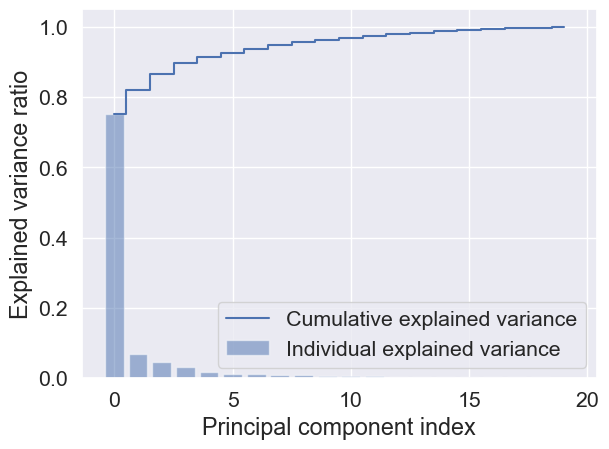

In [35]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plot
#PCA
pca = PCA()

# Determine transformed features
demo_pca = pca.fit_transform(scaled_log_gene.loc[:, scaled_log_gene.columns != 'Label'])

# Determine explained variance using explained_variance_ration_ attribute
exp_var_pca = pca.explained_variance_ratio_

# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.

cum_sum_eigenvalues = np.cumsum(exp_var_pca)

# Create the visualization plot
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [103]:
expr_df = scaled_log_gene.copy()
labels_ex = expr_df['Label'].values
encoder_ex = LabelEncoder() 
encoder_ex.fit(labels_ex)
# .classes_ to print label classes
encoded_expr = encoder_ex.transform(labels_ex) #transform into label encodings (integers)
dummy_expr = np_utils.to_categorical(encoded_expr)

In [104]:
dummy_expr

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [105]:
#pop 'Label'
expr_data = expr_df.copy()
expr_data.pop('Label')

#sampling 
ex_train, ex_remain, ex_result_train, ex_result_remain = train_test_split(expr_data, dummy_expr, 
                                                                          train_size=0.75, shuffle=True, random_state=20,
                                                                          stratify=encoded_expr)

# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
ex_val, ex_test, eresult_val, eresult_test = train_test_split(ex_remain, ex_result_remain, 
                                                              test_size=0.5, shuffle=True, random_state=20)

print(ex_train.shape), print(ex_result_train.shape)
print(ex_val.shape), print(eresult_val.shape)
print(ex_test.shape), print(eresult_test.shape)

(414, 20)
(414, 2)
(69, 20)
(69, 2)
(69, 20)
(69, 2)


(None, None)

In [106]:
# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
ex_integers = np.argmax(ex_result_train, axis=1)
ex_weights = compute_class_weight('balanced', classes=np.unique(ex_integers), y=ex_integers)
d_ex_weights = dict(enumerate(ex_weights))
d_ex_weights

{0: 0.550531914893617, 1: 5.447368421052632}

In [151]:
#create model
model_expr = Sequential() #initiate the nn object
model_expr.add(Dense(8,  activation='sigmoid', input_shape=(20,),  name="bottleneck")) 
model_expr.add(Dense(2,  activation='sigmoid'))

model_expr.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# loss = binary_crossentropy for binary classification only 
# adam -> using adam algorithsm , learning rate = 1e-3
# metrics: calculating the accuracy

history_Ex = model_expr.fit(ex_train, ex_result_train, epochs = 50, batch_size = 4, class_weight=d_ex_weights)
# epochs: number of interation
# batch_size: number of samples used before updating the interal parameters -> divide the samples into batches with size 
# then run the model for weight and bias -> only evaluate the gradient descent and loss at the end epoch with all samples
# popular 32, 64, 128  

Epoch 1/50
104/104 [==============================] - 0s 689us/step - loss: 0.6779 - accuracy: 0.8792
Epoch 2/50
104/104 [==============================] - 0s 689us/step - loss: 0.6405 - accuracy: 0.9300
Epoch 3/50
104/104 [==============================] - 0s 660us/step - loss: 0.6056 - accuracy: 0.9517
Epoch 4/50
104/104 [==============================] - 0s 660us/step - loss: 0.5745 - accuracy: 0.9686
Epoch 5/50
104/104 [==============================] - 0s 660us/step - loss: 0.5354 - accuracy: 0.9807
Epoch 6/50
104/104 [==============================] - 0s 651us/step - loss: 0.4949 - accuracy: 0.9903
Epoch 7/50
104/104 [==============================] - 0s 660us/step - loss: 0.4508 - accuracy: 0.9903
Epoch 8/50
104/104 [==============================] - 0s 651us/step - loss: 0.4057 - accuracy: 0.9928
Epoch 9/50
104/104 [==============================] - 0s 660us/step - loss: 0.3631 - accuracy: 0.9952
Epoch 10/50
104/104 [==============================] - 0s 670us/step - loss: 0.322

In [152]:
history2_ex = model_expr.fit(ex_train, ex_result_train, validation_data=(ex_val, eresult_val), epochs=50, 
                                batch_size = 4, class_weight=d_ex_weights)

Epoch 1/50
104/104 [==============================] - 0s 2ms/step - loss: 0.0236 - accuracy: 0.9952 - val_loss: 0.0143 - val_accuracy: 1.0000
Epoch 2/50
104/104 [==============================] - 0s 923us/step - loss: 0.0228 - accuracy: 0.9952 - val_loss: 0.0138 - val_accuracy: 1.0000
Epoch 3/50
104/104 [==============================] - 0s 923us/step - loss: 0.0222 - accuracy: 0.9952 - val_loss: 0.0138 - val_accuracy: 1.0000
Epoch 4/50
104/104 [==============================] - 0s 884us/step - loss: 0.0215 - accuracy: 0.9952 - val_loss: 0.0130 - val_accuracy: 1.0000
Epoch 5/50
104/104 [==============================] - 0s 923us/step - loss: 0.0211 - accuracy: 0.9952 - val_loss: 0.0123 - val_accuracy: 1.0000
Epoch 6/50
104/104 [==============================] - 0s 952us/step - loss: 0.0204 - accuracy: 0.9952 - val_loss: 0.0119 - val_accuracy: 1.0000
Epoch 7/50
104/104 [==============================] - 0s 874us/step - loss: 0.0201 - accuracy: 0.9952 - val_loss: 0.0114 - val_accuracy: 1

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bottleneck (Dense)          (None, 8)                 168       
                                                                 
 dense_9 (Dense)             (None, 2)                 18        
                                                                 
Total params: 186
Trainable params: 186
Non-trainable params: 0
_________________________________________________________________


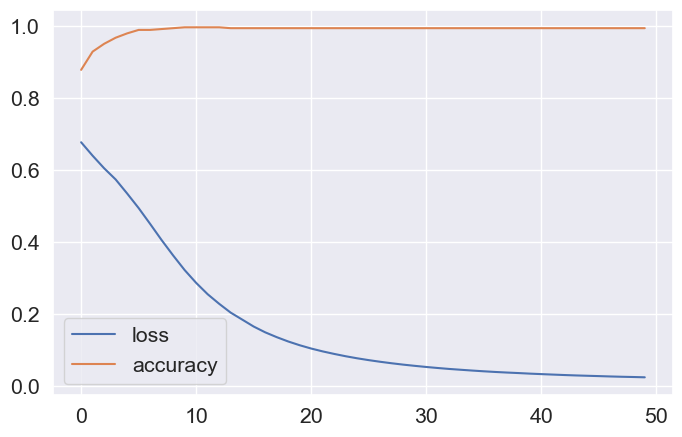

In [153]:
model_expr.summary()

pd.DataFrame(history_Ex.history).plot(figsize=(8,5))
plt.show()

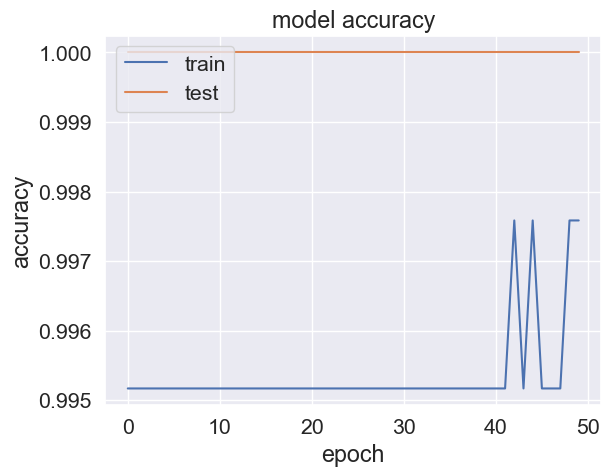

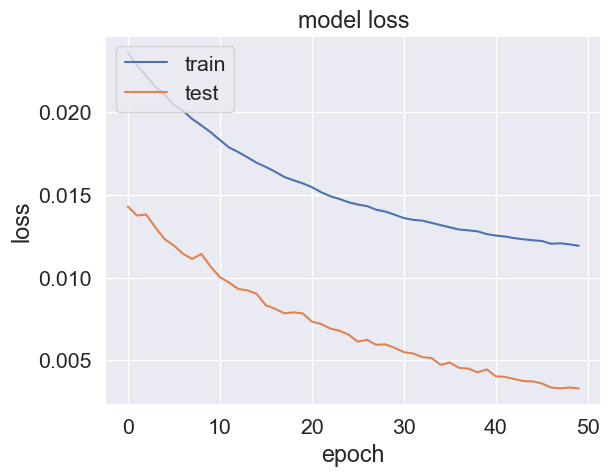

In [155]:
# summarize history for accuracy
plt.plot(history2_ex.history['accuracy'])
plt.plot(history2_ex.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history2_ex.history['loss'])
plt.plot(history2_ex.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [134]:
predictions_ex = model_expr.predict(expr_data)
prediction_ex_ = np.argmax(predictions_ex, axis = 1)
prediction_ex_ = encoder_ex.inverse_transform(prediction_ex_)

for i, j in zip(prediction_ex_ , labels_ex):
    print( " the nn predict {}, and the tumour tissue is {}".format(i,j))
confusion_matrix(prediction_ex_, labels_ex)

18/18 [==============================] - 0s 588us/step
 the nn predict Primary Tumor, and the tumour tissue is Primary Tumor
 the nn predict Primary Tumor, and the tumour tissue is Primary Tumor
 the nn predict Primary Tumor, and the tumour tissue is Primary Tumor
 the nn predict Primary Tumor, and the tumour tissue is Primary Tumor
 the nn predict Primary Tumor, and the tumour tissue is Primary Tumor
 the nn predict Primary Tumor, and the tumour tissue is Primary Tumor
 the nn predict Primary Tumor, and the tumour tissue is Primary Tumor
 the nn predict Primary Tumor, and the tumour tissue is Primary Tumor
 the nn predict Primary Tumor, and the tumour tissue is Primary Tumor
 the nn predict Primary Tumor, and the tumour tissue is Primary Tumor
 the nn predict Primary Tumor, and the tumour tissue is Primary Tumor
 the nn predict Primary Tumor, and the tumour tissue is Primary Tumor
 the nn predict Primary Tumor, and the tumour tissue is Primary Tumor
 the nn predict Primary Tumor, and 

array([[500,   0],
       [  1,  51]], dtype=int64)

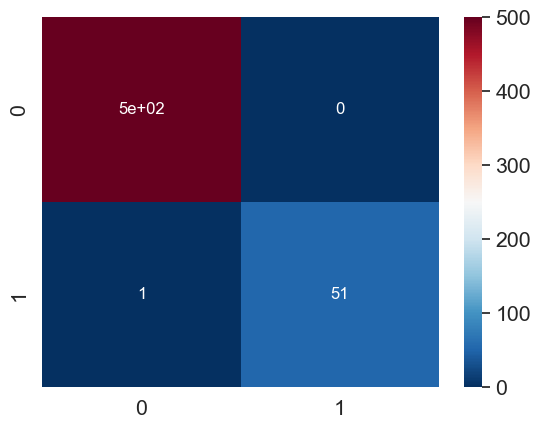

In [135]:
sns.set(font_scale=1.4) # for label size
sns.heatmap(confusion_matrix(prediction_ex_ , labels_ex), annot=True, annot_kws={"size":12}, cmap='RdBu_r') # font size
plt.show()

In [136]:
#loss & accuracy of model
baseline_results = model_expr.evaluate(ex_test, eresult_test,
                                  batch_size=4, verbose=0)
for name, value in zip(model_expr.metrics_names, baseline_results):
      print(name, ': ', value)
print()

#F1_score 
F1_expression = f1_score(labels_ex, prediction_ex_, average='weighted')
print('F1 score with weighted option:', F1_expression)

#Balance accuracy score
BA_expression = balanced_accuracy_score(labels_ex, prediction_ex_ ,)
print('Balance accuracy score: ', BA_expression)

loss :  0.001236811513081193
accuracy :  1.0

F1 score with weighted option: 0.9981962950515082
Balance accuracy score:  0.999001996007984


# MYSTERIOUS GENE EXPRESSION

In [137]:
#load mysterious data gene expression
mys_gene_expression = pd.read_csv("mystery_gene-expr.csv", header=0, index_col=0)

In [138]:
display(mys_gene_expression)
mys_gene_expression["Label"].value_counts()

,Label,..100130426,..100133144,..100134869,..10357,..10431,..136542,..155060,..26823,..280660,...,SYS1.DBNDD2.767557,TMED7.TICAM2.100302736,TMEM189.UBE2V1.387522,TNFSF12.TNFSF13.407977,TRIM6.TRIM34.445372,TSNAX.DISC1.100303453,VTRNA1.1.56664,VTRNA1.2.56663,VTRNA1.3.56662,ZFP91.CNTF.386607
TCGA.BH.A0EI.01,Primary Tumor,0.0000,6.4349,7.4701,93.2677,584.7818,0.0,378.9108,0.0000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA.EW.A1P4.01,Primary Tumor,0.0000,1.0744,2.7221,130.9719,1260.8200,0.0,111.6173,0.0000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA.A2.A0CM.01,Primary Tumor,0.0000,19.7115,3.8260,238.3801,1431.6372,0.0,125.9952,0.0000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA.AO.A12B.01,Primary Tumor,0.0000,2.0510,0.4863,62.7720,749.3393,0.0,276.5620,0.0000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA.E2.A576.01,Primary Tumor,0.0000,2.3190,9.1384,78.9413,1686.9844,0.0,340.5133,0.4583,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA.56.7582.11,Solid Tissue Normal,0.0000,20.6902,7.2740,91.3830,532.9844,0.0,204.0721,0.9987,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA.43.3394.11,Solid Tissue Normal,0.0000,2.3955,10.0695,104.3228,393.2881,0.0,50.6592,0.1598,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA.92.7340.11,Solid Tissue Normal,0.0000,13.5526,3.7880,75.6230,495.4032,0.0,87.8989,0.8969,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA.22.5471.11,Solid Tissue Normal,0.4281,2.1404,8.9897,112.6199,525.6849,0.0,44.9486,0.0000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Primary Tumor          190
Solid Tissue Normal    190
Name: Label, dtype: int64

In [139]:
#subset mysterios data with the GOIs
list_gene = list(expression.columns)
mys_expr_df = mys_gene_expression[list_gene]
display(mys_expr_df)

,Label,SLC2A1.6513,CDCA5.113130,CENPA.1058,POLQ.10721,AGER.177,TROAP.10024,KIF14.9928,EXO1.9156,SERPINB5.5268,...,GINS1.9837,CKAP2L.150468,GPR87.53836,KIF23.9493,PLK1.5347,B4GALNT4.338707,CCNB1.891,RAD54L.8438,C19orf59.199675,CLEC3B.7123
TCGA.BH.A0EI.01,Primary Tumor,2473.9282,151.0236,54.4612,49.4399,17.7675,103.1286,66.4349,112.7849,331.0158,...,278.0997,117.8061,57.5512,327.9258,165.3148,1146.3886,470.0657,71.4562,0.3862,134.0286
TCGA.EW.A1P4.01,Primary Tumor,7522.3994,1068.7168,610.8580,434.7001,28.4738,473.0448,771.4503,489.3698,14725.5125,...,339.7874,445.7099,36.8261,1705.7707,2648.8231,395.5961,2305.6188,495.0645,27.7145,19.3622
TCGA.A2.A0CM.01,Primary Tumor,1492.5580,1100.7269,365.9859,383.9852,54.9210,571.3626,777.2009,500.7500,1569.6319,...,920.2723,413.5226,5.5382,1595.4771,2010.3842,493.8272,2464.0591,530.2873,5.5382,83.9968
TCGA.AO.A12B.01,Primary Tumor,1370.9694,296.8601,71.4663,31.7158,20.7210,82.8840,62.5859,94.3017,10.5719,...,122.6345,92.6102,0.0000,251.6122,219.4735,542.1292,1233.5342,45.6708,0.0000,180.1459
TCGA.E2.A576.01,Primary Tumor,812.0990,662.2365,170.9441,71.0357,204.3996,694.7754,80.6599,155.8203,16.0403,...,634.2805,62.7864,4.1247,195.6920,538.4968,4309.8075,1467.4610,229.1476,0.9166,766.2695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA.56.7582.11,Solid Tissue Normal,262.6638,81.2294,14.9808,19.3086,21601.6832,36.2869,24.9680,18.3099,7.9898,...,59.9233,25.9668,11.3188,87.2217,77.2345,3.9949,154.4689,20.9732,1449.1451,509.6809
TCGA.43.3394.11,Solid Tissue Normal,766.7599,46.5042,5.1139,14.8622,41394.8062,13.5837,15.0220,14.0631,108.5098,...,36.1167,17.5789,23.6516,60.8869,50.4994,10.5473,85.0180,12.1454,2446.3444,3335.1978
TCGA.92.7340.11,Solid Tissue Normal,283.1303,20.3304,0.8969,4.1857,39204.7238,5.0826,8.3713,4.1857,13.4539,...,16.4437,9.8662,7.1754,44.8464,12.2580,0.5980,64.2798,4.7836,1610.2848,3438.5231
TCGA.22.5471.11,Solid Tissue Normal,389.5548,26.5411,2.5685,2.5685,43254.2808,4.2808,1.7123,3.8527,33.8185,...,15.4110,6.4212,14.5548,30.8219,13.2705,3.8527,76.6267,5.5651,5835.6164,2132.7055


In [140]:
#checking null values
mys_expr_df.isnull().any(axis=1).sum()

0

## Preprocessing data the same as when doing stat

In [141]:
mys_expr_data = mys_expr_df.copy()

#log2(RPKM + 1)
log_mys_data = np.log2(mys_expr_data.loc[:, mys_expr_data.columns != 'Label'] + 1)
display(log_mys_data)
#log_mys_data.insert(0, 'Label', mys_expr_data['Label'])
#normalize
scaler = MinMaxScaler()
scaler.fit(log_mys_data)
scaled = scaler.fit_transform(log_mys_data)
scaled_log_mys=pd.DataFrame(scaled, columns=log_mys_data.columns, index=log_mys_data.index)
scaled_log_mys.describe()
scaled_log_mys.insert(0, "Label", mys_expr_data['Label'])

#encode labels
true_label_mys_expr = scaled_log_mys.pop('Label')
encoder_expr = LabelEncoder() 
encoder_expr.fit(true_label_mys_expr)
encoded_expr_data = encoder_expr.transform(true_label_mys_expr) #transform into label encodings (integers)


,SLC2A1.6513,CDCA5.113130,CENPA.1058,POLQ.10721,AGER.177,TROAP.10024,KIF14.9928,EXO1.9156,SERPINB5.5268,GPD1.2819,GINS1.9837,CKAP2L.150468,GPR87.53836,KIF23.9493,PLK1.5347,B4GALNT4.338707,CCNB1.891,RAD54L.8438,C19orf59.199675,CLEC3B.7123
TCGA.BH.A0EI.01,11.273171,7.248151,5.793407,5.656494,4.230165,6.702223,6.075424,6.830165,8.375108,3.247548,8.124637,6.892465,5.871627,8.361618,7.377773,10.164138,8.879784,6.179037,0.471135,7.077121
TCGA.EW.A1P4.01,12.877169,10.063013,9.257053,8.767192,4.881361,8.888880,9.593298,8.937726,13.846128,2.969694,8.412728,8.803194,5.241310,10.737054,11.371680,8.631527,11.171564,8.954384,4.843708,4.347822
TCGA.A2.A0CM.01,10.544538,10.105551,8.519581,8.588659,5.805318,9.160786,9.603999,8.970825,10.617129,3.218378,9.847484,8.695307,2.708894,10.640676,10.973973,8.950781,11.267407,9.053348,2.708894,6.409337
TCGA.AO.A12B.01,10.422033,8.218491,6.179238,5.031916,4.441019,6.390324,5.990635,6.574430,3.532554,6.284731,6.949938,6.548594,0.000000,7.980781,7.784461,9.085152,10.269751,5.544448,0.000000,7.501008
TCGA.E2.A576.01,9.667287,9.373380,7.425796,6.170640,7.682290,9.442478,6.351556,7.292969,4.090879,9.437719,9.311250,5.995177,2.357468,7.619794,9.075471,12.073742,10.520089,7.846416,0.938549,9.583590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA.56.7582.11,8.042556,6.361582,3.998268,4.344019,14.398923,5.220597,4.698663,4.271269,3.168289,9.669993,5.928922,4.753112,3.622790,6.463062,6.289733,2.320456,7.280482,4.457673,10.501982,8.996278
TCGA.43.3394.11,9.584511,5.569983,2.612093,3.987521,15.337197,3.866285,4.001982,3.912947,6.774916,10.422395,5.213997,4.215593,4.623609,5.951562,5.686484,3.529484,6.426567,3.716486,11.257001,11.703989
TCGA.92.7340.11,8.150409,4.414839,0.923644,2.374539,15.258777,2.604688,3.228249,2.374539,3.853387,9.544858,4.124634,3.441776,3.031289,5.518737,3.728791,0.676267,6.028565,2.531968,10.653996,11.747993
TCGA.22.5471.11,8.609381,4.783514,1.835318,1.835318,15.400589,2.400757,1.439517,2.278788,5.121782,11.741805,4.036591,2.891652,3.959288,4.991948,3.834964,2.278788,6.278481,2.714817,12.510917,11.059145


In [142]:
#prediction
mys_ex_prd = model_expr.predict(scaled_log_mys)
mys_exprd_ = np.argmax(mys_ex_prd, axis = 1)
mys_exprd_ = encoder_expr.inverse_transform(mys_exprd_)

#print prediction
for i, j in zip(mys_exprd_ , true_label_mys_expr):
    print( " the nn predict {}, and the tumour tissue is {}".format(i,j))
confusion_matrix(mys_exprd_, true_label_mys_expr)

12/12 [==============================] - 0s 636us/step
 the nn predict Primary Tumor, and the tumour tissue is Primary Tumor
 the nn predict Primary Tumor, and the tumour tissue is Primary Tumor
 the nn predict Primary Tumor, and the tumour tissue is Primary Tumor
 the nn predict Primary Tumor, and the tumour tissue is Primary Tumor
 the nn predict Primary Tumor, and the tumour tissue is Primary Tumor
 the nn predict Primary Tumor, and the tumour tissue is Primary Tumor
 the nn predict Primary Tumor, and the tumour tissue is Primary Tumor
 the nn predict Primary Tumor, and the tumour tissue is Primary Tumor
 the nn predict Primary Tumor, and the tumour tissue is Primary Tumor
 the nn predict Primary Tumor, and the tumour tissue is Primary Tumor
 the nn predict Primary Tumor, and the tumour tissue is Primary Tumor
 the nn predict Primary Tumor, and the tumour tissue is Primary Tumor
 the nn predict Primary Tumor, and the tumour tissue is Primary Tumor
 the nn predict Primary Tumor, and 

array([[186,  91],
       [  4,  99]], dtype=int64)

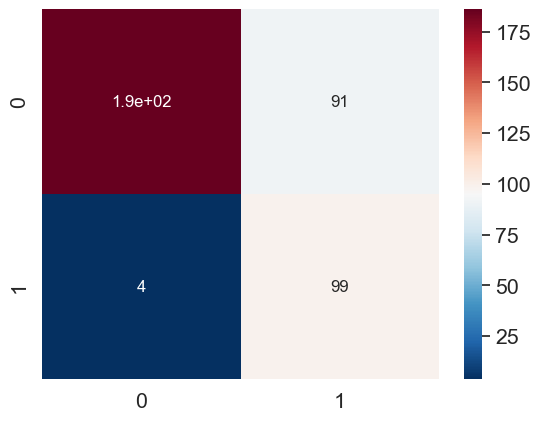

In [143]:
#draw confusion matrix)
sns.set(font_scale=1.4) # for label size
sns.heatmap(confusion_matrix(mys_exprd_ , true_label_mys_expr), annot=True, annot_kws={"size":12}, cmap='RdBu_r') # font size
plt.show()

In [195]:
#accuracy
print("Accuracy:", accuracy_score(true_label_mys_expr,mys_exprd_))

#F1_score for 
F1_expression_mys = f1_score(true_label_mys_expr,mys_exprd_, average='weighted')
print('F1 score with weighted option:', F1_expression_mys)

#Balance accuracy score
BA_expression_mys = balanced_accuracy_score(true_label_mys_expr,mys_exprd_)
print('Balance accuracy score: ', BA_expression_mys)

Accuracy: 0.75
F1 score with weighted option: 0.7361708969458673
Balance accuracy score:  0.75
